WARNING: DO NOT RUN ALL

Bởi vì thời gian train model trên máy em lên tới 78p nên đã save model với tên y_model.h5

Vì thế hãy thay đổi cell thứ 7

"calc_model = model.fit(
  train_img,
  validation_data=val_img,
  epochs=20
)

model.save('y_model.h5')"

thành markdown rồi run all hoặc bỏ cell thứ 7 chạy 2 cell cuối cùng.

Bởi vì file lưu model tới 200MB quá lớn nên không thể nộp trên moodle được, em để link google drive ở đây, thầy tải xuống giúp em ạ

https://drive.google.com/drive/folders/1nGXuVWdamzW-0LSbips1pEncNTHrYJ9Q?usp=sharing

In [1]:
#File management
import pandas as pd
import csv
import os
import numpy as np
import shutil

#Algorithm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#Review data
import matplotlib.pyplot as plt
import collections

Trong thư mục nên có hai file train.csv và test.csv để pandas có thể truy cập được. Google Colab cần mount với google drive để chạy.

Folder images chứa các ảnh test và train nên có sẵn vì code dưới dựa vào các file ảnh thầy đã cung cấp để tạo ra các folder phục vụ cho việc dán nhãn.

Thư mục classification cùng với 4 sub-folder với 4 loại bệnh sẽ được tạo ra.

Bởi vì các file ảnh quá lớn, thầy copy folder "images" chứa các ảnh train, test như đã gửi vào folder chạy chương trình để chạy cell này

In [14]:
train_path = 'train.csv'
parent_dir_cls = 'classification/'
df_train = pd.read_csv(train_path)

if os.path.exists(parent_dir_cls) == False:
    os.mkdir(parent_dir_cls)
    
#Get class-names
header = list(df_train)
image_header = header[0]
header.pop(0)
label_list = []

#Label images from train.csv
for row in range(len(df_train)):
    for label in header:
        if(df_train.loc[row,label] == 1):
            image_id = df_train.loc[row,image_header]
            label_list.append((image_id+".jpg",label))

#Create class-names folder
for label in header:
    path = os.path.join(parent_dir_cls, label)
    if (os.path.exists(path)) == False:
        os.mkdir(path)

#Copy labeled images to suitable folders
for elem in label_list:
    #Original path
    original = "images/" + elem[0]
    #Target path
    target = parent_dir_cls + elem[1] + '/' + elem[0]
    #Copy the image
    shutil.copyfile(original, target)
    

Tạo data cho Train và Test

In [3]:
parent_dir_cls = 'classification/'
batch_size = 100
height = 400
width = 400

#Create training and testing dataset
train_img = tf.keras.utils.image_dataset_from_directory(
  parent_dir_cls,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(height, width),
  batch_size=batch_size)
  
val_img = tf.keras.utils.image_dataset_from_directory(
  parent_dir_cls,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(height, width),
  batch_size=batch_size)


class_names = train_img.class_names
print(class_names)

Found 1821 files belonging to 4 classes.
Using 1457 files for training.
Found 1821 files belonging to 4 classes.
Using 364 files for validation.
['healthy', 'multiple_diseases', 'rust', 'scab']


In [4]:
#Configure the cache for dataset
AUTOTUNE = tf.data.AUTOTUNE
train_img = train_img.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_img = val_img.cache().prefetch(buffer_size=AUTOTUNE)

Apply các layer cho model, thêm các layer random tránh việc overfitting

In [5]:
#Overfitting
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(height,width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)
])

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

Train model với epochs = 20 lần và save model với định dạng h5

In [ ]:
calc_model = model.fit(
  train_img,
  validation_data=val_img,
  epochs=20
)
model.save('y_model.h5')

Epoch 1/20
15/15 [==============================] - 311s 18s/step - loss: 3.0124 - accuracy: 0.3349 - val_loss: 1.2932 - val_accuracy: 0.3984
Epoch 2/20
15/15 [==============================] - 261s 18s/step - loss: 1.2522 - accuracy: 0.3418 - val_loss: 1.2653 - val_accuracy: 0.3352
Epoch 3/20
15/15 [==============================] - 244s 16s/step - loss: 1.1989 - accuracy: 0.4303 - val_loss: 1.2938 - val_accuracy: 0.3544
Epoch 4/20
15/15 [==============================] - 241s 16s/step - loss: 1.1415 - accuracy: 0.4729 - val_loss: 1.1677 - val_accuracy: 0.4973
Epoch 5/20
15/15 [==============================] - 241s 16s/step - loss: 1.0738 - accuracy: 0.5456 - val_loss: 1.1760 - val_accuracy: 0.5027
Epoch 6/20
15/15 [==============================] - 240s 16s/step - loss: 0.9724 - accuracy: 0.6136 - val_loss: 1.2525 - val_accuracy: 0.5495
Epoch 7/20
15/15 [==============================] - 235s 16s/step - loss: 0.8837 - accuracy: 0.6678 - val_loss: 1.1463 - val_accuracy: 0.5522
Epoch 

Load model từ file y_model.h5

In [7]:
new_model = tf.keras.models.load_model('y_model.h5')

Thực hiện việc test trên các ảnh đã cho

In [13]:
image_dir = "images/"

height = 400
width = 400

list_class = []

with open('test.csv','r',newline='',encoding='utf-8') as f:
    csv_reader = csv.reader(f, delimiter=',')
    for row in csv_reader:
        fileName = row[0] + ".jpg"
        img_path = image_dir + fileName
        if os.path.exists(img_path):
            load_img = tf.keras.utils.load_img(img_path,target_size=(height,width))
            img_array = tf.keras.utils.img_to_array(load_img)
            img_array = tf.expand_dims(img_array, 0)
            predictions = new_model.predict(img_array)
            score = tf.nn.softmax(predictions[0])
            pred_class = class_names[np.argmax(score)]
            
            print(fileName + " maybe " + pred_class)

            list_class.append(pred_class)


Test_0.jpg maybe rust
Test_1.jpg maybe rust
Test_2.jpg maybe scab
Test_3.jpg maybe healthy
Test_4.jpg maybe rust
Test_5.jpg maybe healthy
Test_6.jpg maybe healthy
Test_7.jpg maybe scab
Test_8.jpg maybe scab
Test_9.jpg maybe rust
Test_10.jpg maybe healthy
Test_11.jpg maybe healthy
Test_12.jpg maybe scab
Test_13.jpg maybe scab
Test_14.jpg maybe rust
Test_15.jpg maybe rust
Test_16.jpg maybe rust
Test_17.jpg maybe scab
Test_18.jpg maybe scab
Test_19.jpg maybe rust
Test_20.jpg maybe healthy
Test_21.jpg maybe scab
Test_22.jpg maybe rust
Test_23.jpg maybe scab
Test_24.jpg maybe healthy
Test_25.jpg maybe healthy
Test_26.jpg maybe scab
Test_27.jpg maybe rust
Test_28.jpg maybe healthy
Test_29.jpg maybe rust
Test_30.jpg maybe healthy
Test_31.jpg maybe rust
Test_32.jpg maybe scab
Test_33.jpg maybe scab
Test_34.jpg maybe healthy
Test_35.jpg maybe scab
Test_36.jpg maybe rust
Test_37.jpg maybe healthy
Test_38.jpg maybe scab
Test_39.jpg maybe rust
Test_40.jpg maybe rust
Test_41.jpg maybe rust
Test_42.

Trực quan hoá dữ liệu thu được

Counter({'rust': 810, 'healthy': 544, 'scab': 465, 'multiple_diseases': 2})


<BarContainer object of 4 artists>

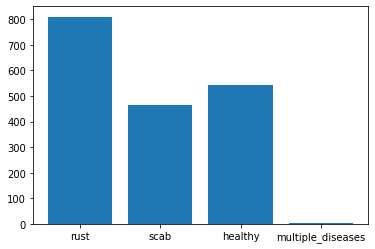

In [15]:
#print(list_class)
w = collections.Counter(list_class)

plt.bar(w.keys(), w.values())
